**What is Exploratory Data Analysis?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more which I will be using in my dataset.

**What Data we are exploring now?**

**Exploratory data analysis of the New York City school level College Board SAT results for the graduating seniors of 2010.**

**Data Set:** SAT__College_Board__2010_School_Level_Results.csv

**Source:** https://data.cityofnewyork.us/api/views/zt9s-n5aj/rows.csv?accessType=DOWNLOAD

**Description:** Data is all about of New York City school level College Board SAT results for the graduating seniors of 2010. Records contain 2010 College-bound seniors mean SAT scores.Records with 5 or fewer students are suppressed (marked ‘s’).
College-bound seniors are those students that complete the SAT Questionnaire when they register for the SAT and identify that they will graduate from high school in a specific year. For example, the 2010 college-bound seniors are those students that self-reported they would graduate in 2010. Students are not required to complete the SAT Questionnaire in order to register for the SAT. Students who do not indicate which year they will graduate from high school will not be included in any college-bound senior report.
Students are linked to schools by identifying which school they attend when registering for a College Board exam. A student is only included in a school’s report if he/she self-reports being enrolled at that school.
Data collected and processed by the College Board.
Data is free to download and legal to access.

**Size:**
The size of the data source is 24.3 KB and also includes different types with 461 rows and 6 columns.

**Aim:**
Exploration and Analysis of the data to perform visualization.

**Conclusion:** From this data set and the plots, I have observed the following:

*   The highest mean scores was by STUYVESANT HIGH SCHOOL with DBN 02M475.
*   The highest number of Test Takers were from BROOKLYN TECHNICAL HIGH SCHOOL with DBN 13K430.
*   Very Few Schools have scored ABOVE 1800 Total average SAT Scores.
*   The Number of Test Takers were also less in many schools in New York City in 2010.

**Importing necessary libraries**

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualisation
from matplotlib.pyplot import figure
%matplotlib inline 
sns.set(color_codes=True)

**Reading school level College Board SAT results of New York city csv data as Dataframe using pandas**

In [2]:
df = pd.read_csv('SAT__College_Board__2010_School_Level_Results.csv')

**Using shape, able to identify the size of the data frame which gives in the format of (rows,columns)**

In [3]:
df.shape 

(460, 6)

**Identifying the data types of all the columns in the dataframe**

In [4]:
df.dtypes

DBN                       object
School Name               object
Number of Test Takers    float64
Critical Reading Mean    float64
Mathematics Mean         float64
Writing Mean             float64
dtype: object

**Using head function, identifying the first 8 rows of the data frame**

In [5]:
df.head(8)  

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0
7,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0


**Using tail function, identifying the last 8 rows of the data frame**

In [6]:
df.tail(8)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
452,75M035,MANHATTAN HIGH SCHOOL - P35M,NaN,NaN,NaN,NaN
453,75Q004,P4Q SCHOOL (@ 179),NaN,NaN,NaN,NaN
454,75Q256,P256 QUEENS SCHOOL @ SAINT MARY'S,NaN,NaN,NaN,NaN
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,76K460,John Jay High School,9.0,390.0,381.0,398.0
459,79X490,PHOENIX SCHOOL,7.0,404.0,423.0,416.0


**Finding Number of Null values in data frame**

In [7]:
df.isnull().sum()

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64

**As we found some null values, there can be 2 approaches done when we find such null values:**
*   **filling the null values in the columns Number of Test Takers, Critical Reading Mean, Mathematics Mean and Writing Mean with 0.**
*  **dropping the values.**

**This step is certainly needed in every EDA because sometimes there would be uninformative data that we can never use in such cases dropping is the only solution.**

**Here,I am dropping null data as there were no sat scores recorded for few schools.**

In [8]:
# df["Number of Test Takers"].fillna(0, inplace = True) 
# df["Critical Reading Mean"].fillna(0, inplace = True) 
# df["Mathematics Mean"].fillna(0, inplace = True) 
# df["Writing Mean"].fillna(0, inplace = True) 
df = df.dropna() 
df.count()

DBN                      386
School Name              386
Number of Test Takers    386
Critical Reading Mean    386
Mathematics Mean         386
Writing Mean             386
dtype: int64

**Renaming the coulmn Names/Labels**

**This approach is done for better understanding which improves the readability of the data set.**

**Here, In this dataset:** 
*   from DBN to  District Borough Number (New York City Department of Education 
school identifier), it is a school indentification number.
*   School Name and Critical Reading Mean, Mathematics Mean and Writng Mean



In [9]:
df=df.rename(columns = {'DBN':'District_Borough_Number','School Name':'School_Name','Number of Test Takers':'Number_of_TestTakers','Critical Reading Mean':'Reading','Mathematics Mean':'Mathematics','Writing Mean':'Writing'})
df.head(8)

,District_Borough_Number,School_Name,Number_of_TestTakers,Reading,Mathematics,Writing
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0
7,01M650,CASCADES HIGH SCHOOL,35.0,411.0,401.0,401.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0


**Checking and Identifying the duplicate Data.**

**This is often a handy thing to do because a huge data set  often may have some duplicate data which might be disturbing, so identifying the duplicate values and remove all them from the data-set is a good approach.**

In [10]:
df.shape

(386, 6)

In [11]:
duplicated_rows = df[df.duplicated()]
print('number of duplicate rows: ', duplicated_rows.shape)

number of duplicate rows:  (0, 6)


**Here In this dataset, as we dont have any duplicate values there no change in thr row count.**

**But, if we have duplicate values we can remove them, which is done mostly.**

In [12]:
df = df.drop_duplicates()
df.shape

(386, 6)

**Using describe function**

**The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data**

In [13]:
df.describe()

,Number_of_TestTakers,Reading,Mathematics,Writing
count,386.000000,386.000000,386.000000,386.000000
mean,103.658031,404.248705,412.935233,397.689119
std,145.264496,56.815631,64.990976,57.762584
min,7.000000,291.000000,281.000000,285.000000
25%,35.000000,370.000000,372.000000,364.000000
50%,54.000000,392.500000,394.500000,383.000000
75%,92.750000,419.000000,429.750000,414.000000
max,1047.000000,674.000000,735.000000,678.000000


**Creating the coulmn Total for calculating the total SAT scores for New York City Department of Education schools.**

In [14]:
df['Total'] = df['Reading'] + df['Mathematics'] + df['Writing']
df.head()

,District_Borough_Number,School_Name,Number_of_TestTakers,Reading,Mathematics,Writing,Total
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0,1201.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0,1200.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0,1251.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0,1133.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0,1160.0


**Sorting the data by Total Score to know in which schools the people has scored the highest marks in the test**

In [15]:
data = df.sort_values(by=["Total"],ascending=False)

In [16]:
data = data.head(10)
data.head(10)

,District_Borough_Number,School_Name,Number_of_TestTakers,Reading,Mathematics,Writing,Total
42,02M475,STUYVESANT HIGH SCHOOL,804.0,674.0,735.0,678.0,2087.0
185,10X445,BRONX HIGH SCHOOL OF SCIENCE,683.0,632.0,685.0,643.0,1960.0
442,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,287.0,638.0,673.0,617.0,1928.0
384,25Q525,Townsend Harris High School at Queens College,273.0,637.0,644.0,642.0,1923.0
193,10X696,HS of American Studies at Lehman College,74.0,635.0,630.0,619.0,1884.0
412,28Q687,QUEENS HS FOR SCIENCE YORK COL,99.0,613.0,650.0,612.0,1875.0
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138.0,630.0,608.0,630.0,1868.0
235,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1047.0,588.0,652.0,581.0,1821.0
99,05M692,High School For Math Science Engineering City ...,106.0,592.0,627.0,575.0,1794.0
26,02M412,New York City Laboratory School Collab Studies,108.0,561.0,597.0,567.0,1725.0


**Plot different features against one another (scatter), against frequency (histogram)**
*   **Histogram**

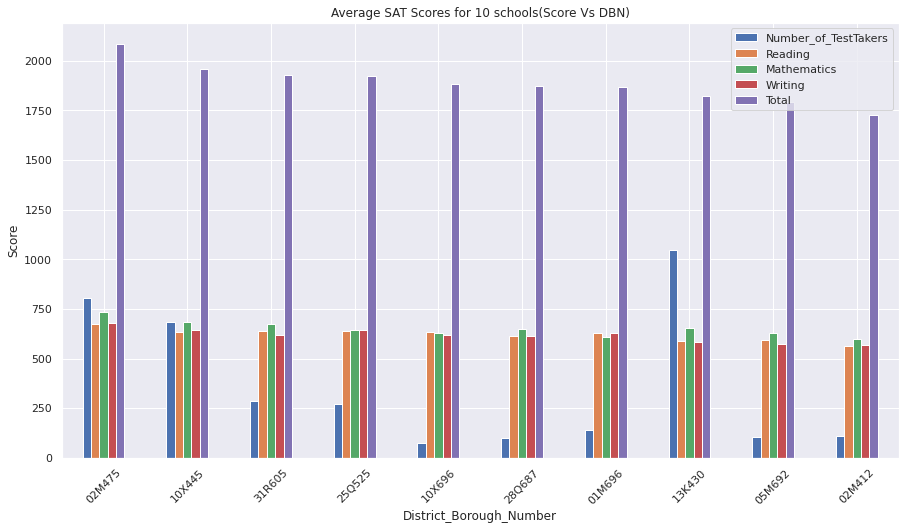

In [17]:
# xticklabels = list(data["District_Borough_Number"])
data.plot(kind= "bar",figsize=(15,8))
plt.title("Average SAT Scores for 10 schools(Score Vs DBN)")
plt.xlabel("District_Borough_Number")
plt.ylabel("Score")
tick_marks = np.arange(len(list(data["District_Borough_Number"])))
plt.xticks(tick_marks,list(data["District_Borough_Number"]),rotation=45)
plt.show()

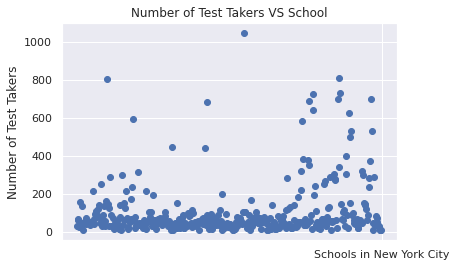

In [18]:
# Plotting a scatter plot
plt.scatter(y='Number_of_TestTakers',x='School_Name',data=df)
plt.ylabel('Number of Test Takers')
plt.title('Number of Test Takers VS School')
plt.xticks('Schools in New York City')
plt.show()

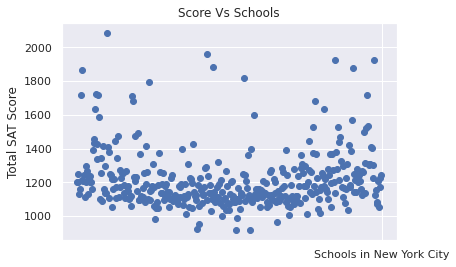

In [19]:
# Plotting a scatter plot
plt.scatter(y='Total',x='School_Name',data=df)
plt.ylabel('Total SAT Score')
plt.xticks('Schools in New York City')
plt.title('Score Vs Schools')
plt.show()

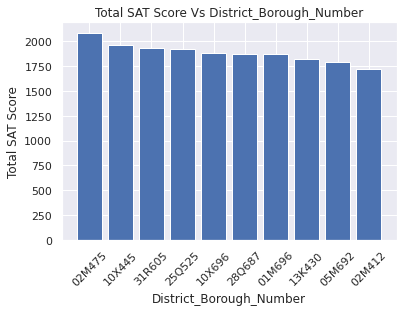

In [20]:
#Plotting a bar plot
objects = np.arange(len(list(data["District_Borough_Number"])))
y_pos = np.arange(len(objects))
performance =  data['Total']
plt.bar(y_pos, performance)
tick_marks = np.arange(len(list(data["District_Borough_Number"])))
plt.xticks(tick_marks,list(data["District_Borough_Number"]),rotation=45)
plt.ylabel('Total SAT Score')
plt.xlabel('District_Borough_Number')
plt.title('Total SAT Score Vs District_Borough_Number')
plt.show()

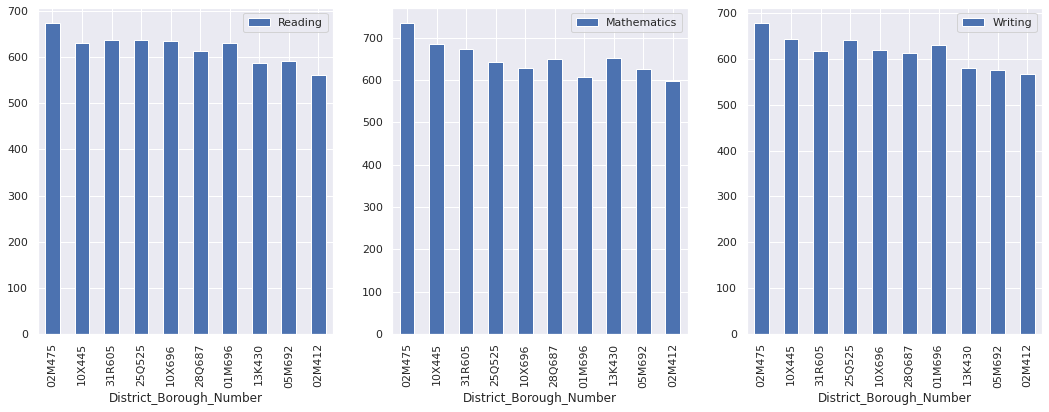

In [21]:
fig,axs = plt.subplots(1,3,figsize=(18,6))
data.plot.bar('District_Borough_Number','Reading',ax=axs[0])
data.plot.bar('District_Borough_Number','Mathematics',ax=axs[1])
data.plot.bar('District_Borough_Number','Writing',ax=axs[2])

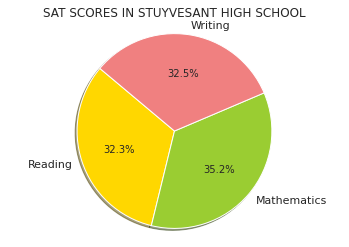

In [22]:
# Data to plot
labels = ['Reading',"Mathematics","Writing"]
sizes = [data['Reading'].values[0],data['Mathematics'].values[0],data['Writing'].values[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('SAT SCORES IN STUYVESANT HIGH SCHOOL')
plt.axis('equal')
plt.show()

**BRIEF SUMMARY:**

Things learnt and done with my dataset.
*   Read the DataSet.Identify the shape and summarize the main features in the dataset.
*  Clean the data, removing the uniformative data and also by not having any important data lose.
*  Plotting and Visualising the data appropriately with suitable plots which imporves understanding and Readability.